# Capstone Project - Car classification

Link to Original dataset: https://www.kaggle.com/datasets/kshitij192/cars-image-dataset

Predicting 7 classes of Cars

## Import Packages and Data

In [12]:
import os

In [13]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline



In [14]:
import tensorflow as tf
from tensorflow import keras

In [15]:
from tensorflow.keras.preprocessing.image import load_img

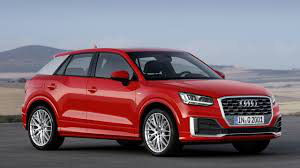

In [19]:
path = 'Dataset/train/Audi'
name = '20.jpg'
fullname = f'{path}/{name}'
fullname

load_img(fullname)

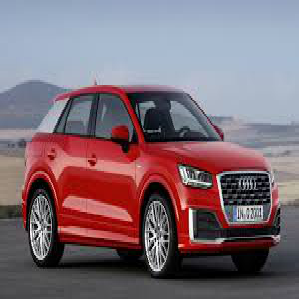

In [20]:
img = load_img(fullname, target_size=(299, 299))
img

In [21]:
x = np.array(img)
x.shape

(299, 299, 3)

In [22]:
##PIL python image library
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x1CB00553F70>


In [23]:
np.array(img)

array([[[145, 162, 188],
        [145, 162, 188],
        [145, 162, 188],
        ...,
        [150, 166, 191],
        [150, 166, 191],
        [150, 166, 191]],

       [[145, 162, 188],
        [145, 162, 188],
        [145, 162, 188],
        ...,
        [150, 166, 191],
        [150, 166, 191],
        [150, 166, 191]],

       [[146, 163, 189],
        [146, 163, 189],
        [146, 163, 189],
        ...,
        [150, 166, 191],
        [150, 166, 191],
        [150, 166, 191]],

       ...,

       [[ 72,  72,  74],
        [ 72,  72,  74],
        [ 72,  72,  74],
        ...,
        [ 94,  93,  99],
        [ 94,  93,  99],
        [ 94,  93,  99]],

       [[ 70,  70,  72],
        [ 70,  70,  72],
        [ 70,  70,  72],
        ...,
        [ 88,  87,  93],
        [ 88,  87,  93],
        [ 88,  87,  93]],

       [[ 70,  70,  72],
        [ 70,  70,  72],
        [ 70,  70,  72],
        ...,
        [ 88,  87,  93],
        [ 88,  87,  93],
        [ 88,  87,  93]]

## Transfer Learning

In [24]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [26]:
train_ds = train_gen.flow_from_directory(
    'Dataset/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3352 images belonging to 7 classes.


In [27]:
### checking the class indices
train_ds.class_indices

{'Audi': 0,
 'Hyundai Creta': 1,
 'Mahindra Scorpio': 2,
 'Rolls Royce': 3,
 'Swift': 4,
 'Tata Safari': 5,
 'Toyota Innova': 6}

In [28]:
X, y = next(train_ds)

In [29]:
X

array([[[[-0.27843136, -0.3960784 , -0.5764706 ],
         [-0.25490195, -0.372549  , -0.5529412 ],
         [-0.23921567, -0.3333333 , -0.52156866],
         ...,
         [-0.85882354, -0.8509804 , -0.9137255 ],
         [-0.8352941 , -0.827451  , -0.8901961 ],
         [-0.85882354, -0.8509804 , -0.9137255 ]],

        [[-0.06666666, -0.18431371, -0.36470586],
         [-0.12156862, -0.23921567, -0.41960782],
         [-0.19999999, -0.29411763, -0.4823529 ],
         ...,
         [-0.8745098 , -0.8666667 , -0.92941177],
         [-0.8509804 , -0.84313726, -0.90588236],
         [-0.8901961 , -0.88235295, -0.94509804]],

        [[-0.23137254, -0.3490196 , -0.5294118 ],
         [-0.23137254, -0.3490196 , -0.5294118 ],
         [-0.24705881, -0.34117645, -0.5294118 ],
         ...,
         [-0.8509804 , -0.84313726, -0.90588236],
         [-0.94509804, -0.9372549 , -1.        ],
         [-0.84313726, -0.8352941 , -0.8980392 ]],

        ...,

        [[ 0.827451  ,  0.77254903,  0

In [30]:
y[:3]

array([[0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [31]:
## validation set
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    'Dataset/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 501 images belonging to 7 classes.


In [32]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False

###lAST LINE MEANS DON'T CHANGE Convulutinoal layer

In [33]:
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)
##change 3 dimensional array to one dimensional array

outputs = keras.layers.Dense(7)(vectors)

##There are 7 classes.

model = keras.Model(inputs, outputs)

In [34]:
preds = model.predict(X)

1/1 [==============================] - 2s 2s/step


In [35]:
preds.shape

(32, 7)

In [25]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
## It will show the accuracy

In [26]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)
## 10 epochs means go over the data 10 times.

Epoch 1/10
105/105 [==============================] - 156s 1s/step - loss: 1.3486 - accuracy: 0.6143 - val_loss: 0.9730 - val_accuracy: 0.6587
Epoch 2/10
105/105 [==============================] - 149s 1s/step - loss: 0.6297 - accuracy: 0.7825 - val_loss: 0.7458 - val_accuracy: 0.7645
Epoch 3/10
105/105 [==============================] - 148s 1s/step - loss: 0.5414 - accuracy: 0.8186 - val_loss: 0.8800 - val_accuracy: 0.7445
Epoch 4/10
105/105 [==============================] - 148s 1s/step - loss: 0.3997 - accuracy: 0.8655 - val_loss: 0.6634 - val_accuracy: 0.8024
Epoch 5/10
105/105 [==============================] - 142s 1s/step - loss: 0.3481 - accuracy: 0.8831 - val_loss: 0.9137 - val_accuracy: 0.7824
Epoch 6/10
105/105 [==============================] - 142s 1s/step - loss: 0.3416 - accuracy: 0.8801 - val_loss: 0.8277 - val_accuracy: 0.7864
Epoch 7/10
105/105 [==============================] - 141s 1s/step - loss: 0.2153 - accuracy: 0.9269 - val_loss: 0.7350 - val_accuracy: 0.8124

In [27]:
history.history['accuracy']

[0.6142601370811462,
 0.7825179100036621,
 0.818615734577179,
 0.8654534816741943,
 0.8830549120903015,
 0.8800715804100037,
 0.926909327507019,
 0.9254176616668701,
 0.9406324625015259,
 0.944809079170227]

In [28]:
history.history['val_accuracy']

[0.658682644367218,
 0.7644710540771484,
 0.7445109486579895,
 0.802395224571228,
 0.7824351191520691,
 0.7864271402359009,
 0.8123752474784851,
 0.7984032034873962,
 0.8243513107299805,
 0.7405189871788025]

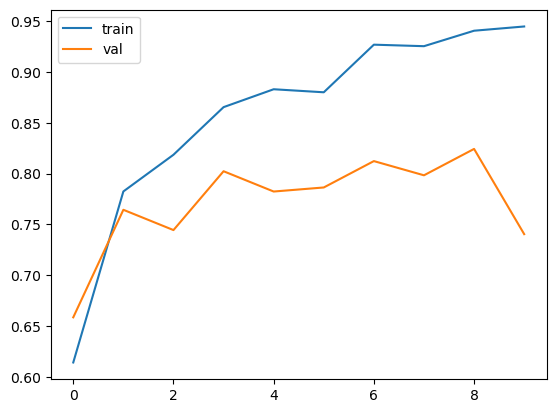

In [29]:
#plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label='val')

plt.legend()

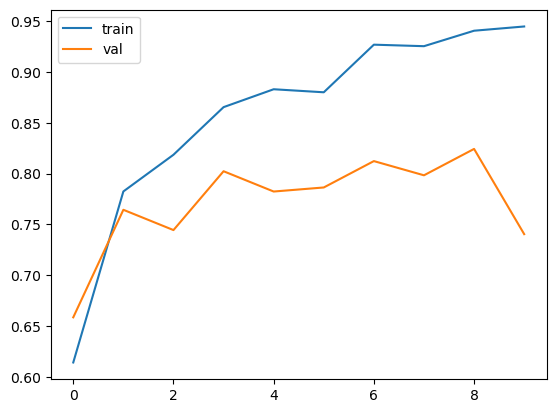

In [30]:
#plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label='val')

plt.legend()

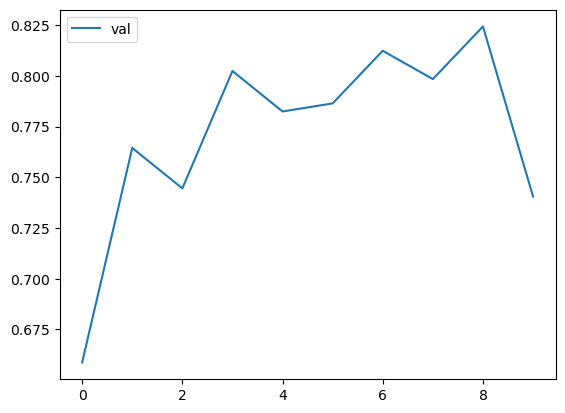

In [31]:
plt.plot(history.history['val_accuracy'], label='val')

plt.legend()

Observation: The model was able to achieve an accuracy of 80% after the 4th Epoch. The model is overfitting because it does extremely well on the training set but struggles (Hovers around 80%) on the Validation dataset

## Hyper parameter Tuning

### Adjusting the learning rate
What's the learning rate
Trying different values

In [3]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(7)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [33]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
105/105 [==============================] - 253s 2s/step - loss: 1.7212 - accuracy: 0.3428 - val_loss: 1.5234 - val_accuracy: 0.4711
Epoch 2/10
105/105 [==============================] - 229s 2s/step - loss: 1.3990 - accuracy: 0.4982 - val_loss: 1.3308 - val_accuracy: 0.5489
Epoch 3/10
105/105 [==============================] - 154s 1s/step - loss: 1.2428 - accuracy: 0.5686 - val_loss: 1.2140 - val_accuracy: 0.5988
Epoch 4/10
105/105 [==============================] - 146s 1s/step - loss: 1.1448 - accuracy: 0.6092 - val_loss: 1.1344 - val_accuracy: 0.6148
Epoch 5/10
105/105 [==============================] - 154s 1s/step - loss: 1.0756 - accuracy: 0.6405 - val_loss: 1.0810 - val_accuracy: 0.6327
Epoch 6/10
105/105 [==============================] - 163s 2s/step - loss: 1.0238 - accuracy: 0.6566 - val_loss: 1.0353 - val_accuracy: 0.6407
Epoch 7/10
105/105 [==============================] - 169s 2s/step - loss: 0.9807 - accuracy: 0.6796 - val_loss: 0.9993 - val_accuracy:

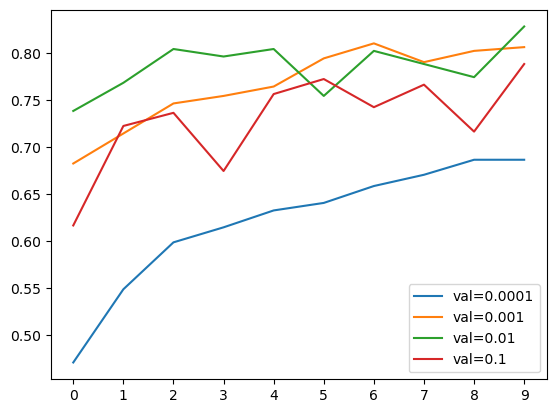

In [35]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

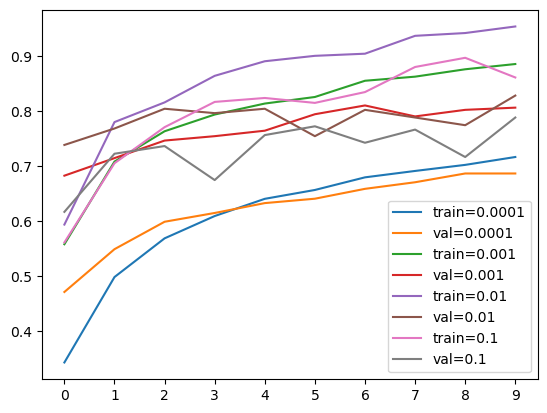

In [36]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [38]:
scores

{0.0001: {'loss': [1.7211905717849731,
   1.3989999294281006,
   1.2428326606750488,
   1.1447958946228027,
   1.0755783319473267,
   1.0238217115402222,
   0.9807398915290833,
   0.9447380304336548,
   0.9139227867126465,
   0.8854913711547852],
  'accuracy': [0.3427804410457611,
   0.49821001291275024,
   0.568615734577179,
   0.6091885566711426,
   0.6405131220817566,
   0.6566228866577148,
   0.6795942783355713,
   0.6912291049957275,
   0.7022672891616821,
   0.7165871262550354],
  'val_loss': [1.52336585521698,
   1.330753207206726,
   1.213979721069336,
   1.1344496011734009,
   1.080998420715332,
   1.0353223085403442,
   0.9993037581443787,
   0.9723829030990601,
   0.9448652863502502,
   0.9254031777381897],
  'val_accuracy': [0.4710578918457031,
   0.5489022135734558,
   0.598802387714386,
   0.6147704720497131,
   0.6327345371246338,
   0.6407185792922974,
   0.658682644367218,
   0.6706587076187134,
   0.6866267323493958,
   0.6866267323493958]},
 0.001: {'loss': [1.214894

In [39]:
type(scores)

dict

In [40]:
import copy

scores_dict = copy.deepcopy(scores)

In [41]:
del scores_dict[0.1]
del scores_dict[0.0001]

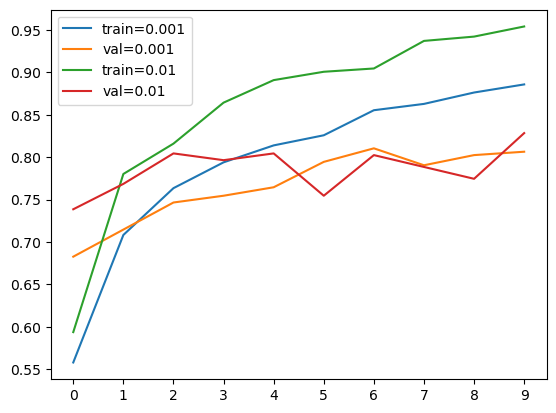

In [42]:
for lr, hist in scores_dict.items():
    plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

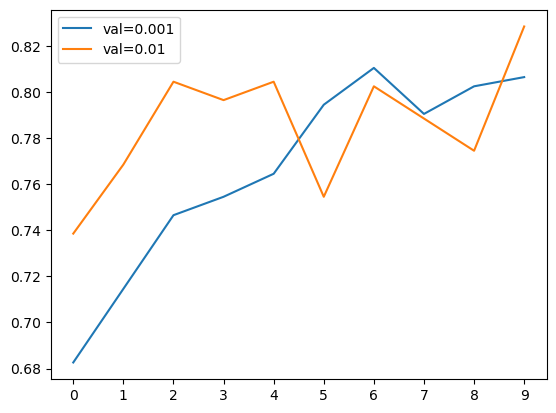

In [43]:
for lr, hist in scores_dict.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

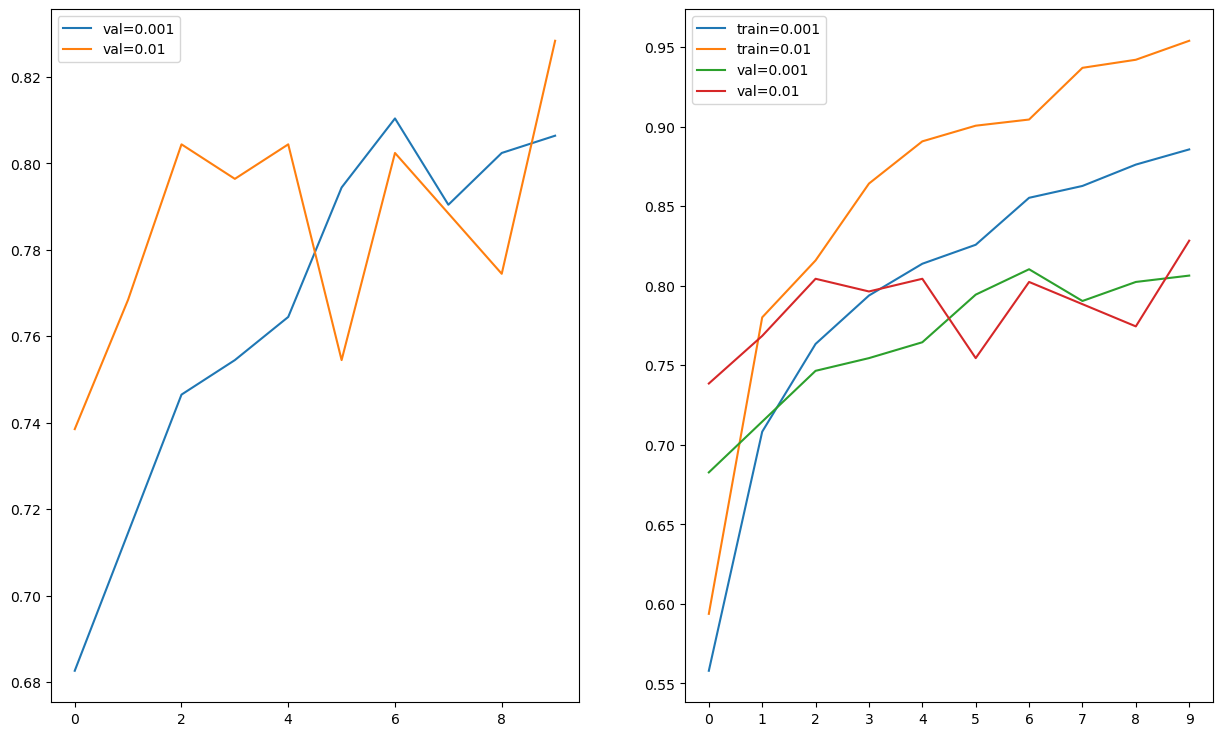

In [85]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 9))

for lr, hist in scores_dict.items():
    plt.plot(hist['accuracy'], label=('train=%s' % lr))
    ax1.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
ax1.legend()

for lr, hist in scores_dict.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    ax2.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
ax2.legend()

plt.show()

From the above picture, 0.001 is the most favourable learning rate because it does not overfit compared to 0.01.

In [81]:
learning_rate = 0.001

## Check pointing

In [ ]:
model.save_weights('model_v1.h5', save_format='h5')

In [82]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [84]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Epoch 1/10
105/105 [==============================] - 168s 2s/step - loss: 1.2214 - accuracy: 0.5594 - val_loss: 0.9700 - val_accuracy: 0.6667
Epoch 2/10
105/105 [==============================] - 148s 1s/step - loss: 0.8560 - accuracy: 0.7070 - val_loss: 0.8134 - val_accuracy: 0.7026
Epoch 3/10
105/105 [==============================] - 154s 1s/step - loss: 0.7342 - accuracy: 0.7595 - val_loss: 0.7449 - val_accuracy: 0.7465
Epoch 4/10
105/105 [==============================] - 162s 2s/step - loss: 0.6411 - accuracy: 0.7918 - val_loss: 0.7078 - val_accuracy: 0.7585
Epoch 5/10
105/105 [==============================] - 151s 1s/step - loss: 0.5800 - accuracy: 0.8168 - val_loss: 0.6835 - val_accuracy: 0.7745
Epoch 6/10
105/105 [==============================] - 161s 2s/step - loss: 0.5357 - accuracy: 0.8371 - val_loss: 0.6470 - val_accuracy: 0.7804
Epoch 7/10
105/105 [==============================] - 166s 2s/step - loss: 0.4973 - accuracy: 0.8511 - val_loss: 0.6195 - val_accuracy: 0.7984

xception_v1_08_0.804.h5 -- has the best accuracy. This was gottem at the 8th epoch.

## 8.8 Adding more layers
- Adding one inner dense layer
- Experimenting with different sizes of inner layer

In [36]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(7)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [37]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()


10
Epoch 1/10
105/105 [==============================] - 142s 1s/step - loss: 1.5608 - accuracy: 0.3789 - val_loss: 1.2536 - val_accuracy: 0.4990
Epoch 2/10
105/105 [==============================] - 143s 1s/step - loss: 1.0792 - accuracy: 0.6205 - val_loss: 1.0011 - val_accuracy: 0.6547
Epoch 3/10
105/105 [==============================] - 137s 1s/step - loss: 0.8749 - accuracy: 0.6993 - val_loss: 0.9141 - val_accuracy: 0.6966
Epoch 4/10
105/105 [==============================] - 139s 1s/step - loss: 0.7559 - accuracy: 0.7476 - val_loss: 0.7918 - val_accuracy: 0.7445
Epoch 5/10
105/105 [==============================] - 138s 1s/step - loss: 0.6622 - accuracy: 0.7819 - val_loss: 0.7398 - val_accuracy: 0.7505
Epoch 6/10
105/105 [==============================] - 138s 1s/step - loss: 0.5971 - accuracy: 0.8013 - val_loss: 0.6893 - val_accuracy: 0.7625
Epoch 7/10
105/105 [==============================] - 137s 1s/step - loss: 0.5430 - accuracy: 0.8243 - val_loss: 0.6667 - val_accuracy: 0.7

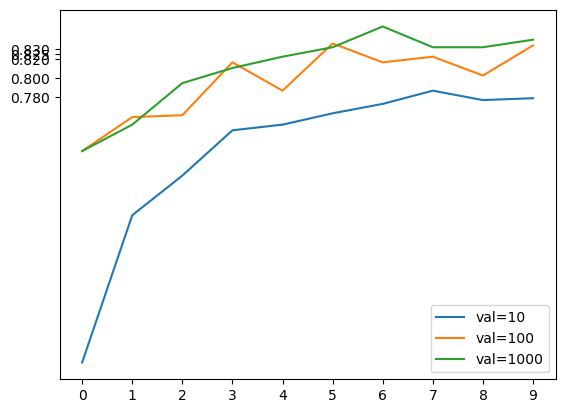

In [40]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

Best inner size is 1000

## Regularization and dropout

In [41]:
def make_model(learning_rate=0.001, size_inner=1000, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(7)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [42]:
learning_rate = 0.001
size = 1000

scores = {}

for droprate in [0.0, 0.2, 0.5]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=25, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/25
105/105 [==============================] - 156s 1s/step - loss: 1.0570 - accuracy: 0.6334 - val_loss: 0.7349 - val_accuracy: 0.7405
Epoch 2/25
105/105 [==============================] - 148s 1s/step - loss: 0.6087 - accuracy: 0.7879 - val_loss: 0.6371 - val_accuracy: 0.7705
Epoch 3/25
105/105 [==============================] - 148s 1s/step - loss: 0.4374 - accuracy: 0.8517 - val_loss: 0.6615 - val_accuracy: 0.7924
Epoch 4/25
105/105 [==============================] - 148s 1s/step - loss: 0.3369 - accuracy: 0.8926 - val_loss: 0.6875 - val_accuracy: 0.7725
Epoch 5/25
105/105 [==============================] - 155s 1s/step - loss: 0.2630 - accuracy: 0.9165 - val_loss: 0.5887 - val_accuracy: 0.8204
Epoch 6/25
105/105 [==============================] - 157s 1s/step - loss: 0.1890 - accuracy: 0.9365 - val_loss: 0.6082 - val_accuracy: 0.8263
Epoch 7/25
105/105 [==============================] - 148s 1s/step - loss: 0.1400 - accuracy: 0.9573 - val_loss: 0.6957 - val_accuracy: 0.

Epoch 8/25
105/105 [==============================] - 340s 3s/step - loss: 0.3545 - accuracy: 0.8741 - val_loss: 0.6241 - val_accuracy: 0.8124
Epoch 9/25
105/105 [==============================] - 335s 3s/step - loss: 0.3137 - accuracy: 0.8857 - val_loss: 0.5524 - val_accuracy: 0.8323
Epoch 10/25
105/105 [==============================] - 343s 3s/step - loss: 0.2827 - accuracy: 0.9001 - val_loss: 0.5759 - val_accuracy: 0.8064
Epoch 11/25
105/105 [==============================] - 341s 3s/step - loss: 0.2508 - accuracy: 0.9093 - val_loss: 0.5720 - val_accuracy: 0.8244
Epoch 12/25
105/105 [==============================] - 341s 3s/step - loss: 0.2493 - accuracy: 0.9114 - val_loss: 0.7015 - val_accuracy: 0.7844
Epoch 13/25
105/105 [==============================] - 341s 3s/step - loss: 0.2326 - accuracy: 0.9242 - val_loss: 0.5837 - val_accuracy: 0.8383
Epoch 14/25
105/105 [==============================] - 340s 3s/step - loss: 0.2028 - accuracy: 0.9317 - val_loss: 0.5992 - val_accuracy: 0

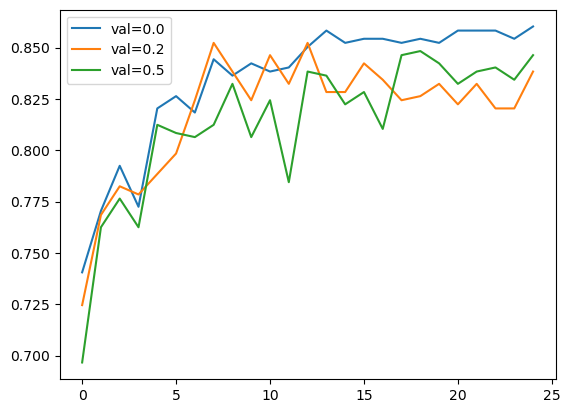

In [45]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))


plt.legend()

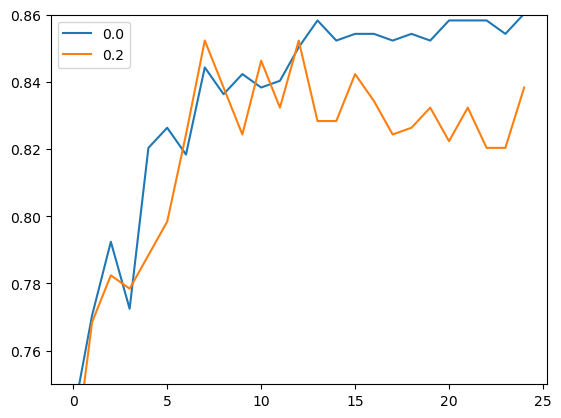

In [49]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.ylim(0.75, 0.86)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

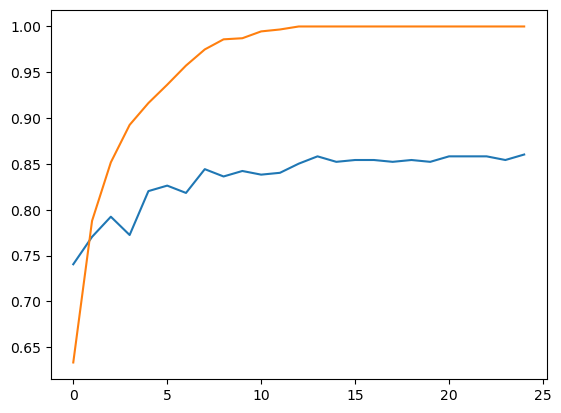

In [47]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.0]
plt.plot(hist['accuracy'], label="0.0 train")

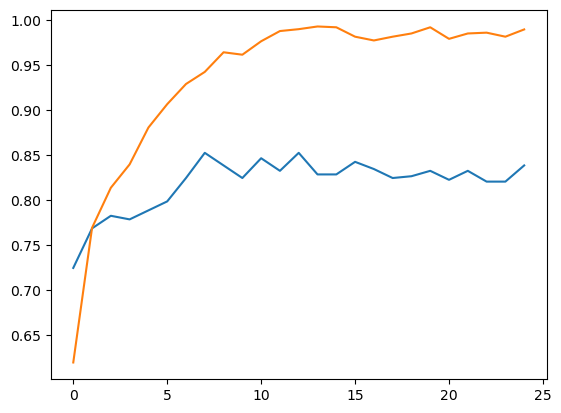

In [48]:
hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

hist = scores[0.2]
plt.plot(hist['accuracy'], label="0.2 train")

As it stands, the most favourable hyper parameters are:

- Learning rate: 0.001
- Inner size : 1000
- Drop rate: 0.2

## Data Augmentation

The data augmentation will be ran together while saving the best model

In [53]:
'''
model.save_weights('model_v2.h5', save_format='h5')
'''

In [54]:
'''
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v2_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

'''

In [55]:
'''
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    vertical_flip=True,
    shear_range=1.0,
    zoom_range=0.1
)

train_ds = train_gen.flow_from_directory(
    'Dataset/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    'Dataset/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)
'''

Found 3352 images belonging to 7 classes.
Found 501 images belonging to 7 classes.


Tried Data Augmentation but was getting worse scores as it oscilated around 78% accuracy on validation dataset. Final model saved without data augmentation.

In [57]:
model.save_weights('model_v3.h5', save_format='h5')

checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v3_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)


In [58]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

train_ds = train_gen.flow_from_directory(
    'Dataset/train',
    target_size=(150, 150),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    'Dataset/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)


Found 3352 images belonging to 7 classes.
Found 501 images belonging to 7 classes.


In [59]:
learning_rate = 0.001
size = 1000
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=15, validation_data=val_ds, callbacks=[checkpoint])

Epoch 1/15
105/105 [==============================] - 157s 1s/step - loss: 1.1571 - accuracy: 0.6041 - val_loss: 0.8914 - val_accuracy: 0.6547
Epoch 2/15
105/105 [==============================] - 146s 1s/step - loss: 0.7358 - accuracy: 0.7393 - val_loss: 0.6839 - val_accuracy: 0.7505
Epoch 3/15
105/105 [==============================] - 144s 1s/step - loss: 0.5327 - accuracy: 0.8135 - val_loss: 0.6065 - val_accuracy: 0.7824
Epoch 4/15
105/105 [==============================] - 142s 1s/step - loss: 0.4442 - accuracy: 0.8443 - val_loss: 0.7070 - val_accuracy: 0.7904
Epoch 5/15
105/105 [==============================] - 139s 1s/step - loss: 0.3555 - accuracy: 0.8774 - val_loss: 0.5490 - val_accuracy: 0.8323
Epoch 6/15
105/105 [==============================] - 138s 1s/step - loss: 0.2788 - accuracy: 0.9069 - val_loss: 0.6366 - val_accuracy: 0.8024
Epoch 7/15
105/105 [==============================] - 140s 1s/step - loss: 0.2371 - accuracy: 0.9212 - val_loss: 0.6207 - val_accuracy: 0.8044

## Model comparison

### Train a Larger Model

In [73]:
def make_model(input_size=150, learning_rate=0.001, size_inner=1000,
               droprate=0.2):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(7)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [74]:
input_size = 299

In [75]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

train_ds = train_gen.flow_from_directory(
    'Dataset/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    'Dataset/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3352 images belonging to 7 classes.
Found 501 images belonging to 7 classes.


In [78]:
model.save_weights('model_v4.h5', save_format='h5')

In [79]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [80]:
learning_rate = 0.001
size = 1000
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/50
105/105 [==============================] - 580s 6s/step - loss: 0.7606 - accuracy: 0.7339 - val_loss: 0.3881 - val_accuracy: 0.8723
Epoch 2/50
105/105 [==============================] - 551s 5s/step - loss: 0.3767 - accuracy: 0.8708 - val_loss: 0.2641 - val_accuracy: 0.9162
Epoch 3/50
105/105 [==============================] - 553s 5s/step - loss: 0.2740 - accuracy: 0.9117 - val_loss: 0.2372 - val_accuracy: 0.9261
Epoch 4/50
105/105 [==============================] - 554s 5s/step - loss: 0.1924 - accuracy: 0.9418 - val_loss: 0.2159 - val_accuracy: 0.9222
Epoch 5/50
105/105 [==============================] - 560s 5s/step - loss: 0.1626 - accuracy: 0.9502 - val_loss: 0.2941 - val_accuracy: 0.8922
Epoch 6/50
105/105 [==============================] - 554s 5s/step - loss: 0.1355 - accuracy: 0.9582 - val_loss: 0.1903 - val_accuracy: 0.9281
Epoch 7/50
105/105 [==============================] - 563s 5s/step - loss: 0.0889 - accuracy: 0.9732 - val_loss: 0.2164 - val_accuracy: 0.9321

### Conclusion

From the training of several models and hyper parameter tuning, The most impactful metrics for the model are the following:

- learning_rate = 0.001
- size = 1000
- droprate = 0.2
- input_size = 299 (This is the size of the input image.)

## Using the model

In [81]:
import tensorflow as tf
from tensorflow import keras

In [82]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [83]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    'Dataset/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 312 images belonging to 7 classes.


In [85]:
model = keras.models.load_model('xception_v4_1_39_0.954.h5')

In [94]:
model.evaluate(test_ds)

10/10 [==============================] - 40s 4s/step - loss: 0.3783 - accuracy: 0.9295


[0.3782911002635956, 0.9294871687889099]

In [95]:
path = 'Dataset/test/Rolls Royce/373.jpg'

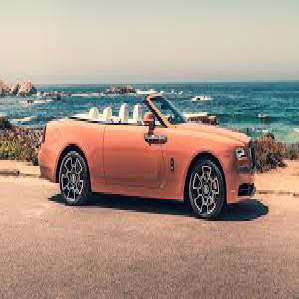

In [96]:
img = load_img(path, target_size=(299, 299))
img

In [97]:
import numpy as np

In [98]:
x = np.array(img)
X = np.array([x])
X.shape


(1, 299, 299, 3)

In [99]:
X = preprocess_input(X)
pred = model.predict(X)

1/1 [==============================] - 0s 274ms/step


In [100]:
classes = [
    'Audi',
    'Hyundai Creta',
    'Mahindra Scorpio',
    'Rolls Royce',
    'Swift',
    'Tata Safari',
    'Toyota Innova'
]

In [101]:
dict(zip(classes, pred[0]))

{'Audi': 2.1595082,
 'Hyundai Creta': 2.4230945,
 'Mahindra Scorpio': -5.9770017,
 'Rolls Royce': 13.654382,
 'Swift': -2.9719963,
 'Tata Safari': -14.594274,
 'Toyota Innova': -14.711775}

From the results, the highest score is for rolls royce which matches the actual image. The results matches the eye test.